
#  2019시즌 야구팀 데이터를 이용한 분석

## 1. 데이터 수집
- selenium, BeautifulSoup로 크롤링을 해 데이터를 수집  
- 출처 : [KBReport](http://www.kbreport.com/teams/main)

In [1]:
# 필요한 라이브러리 import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from bs4 import BeautifulSoup
%matplotlib inline

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글깨짐 해결

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

import time

In [3]:
pd.options.display.max_rows = 20
pd.options.display.max_columns = 30

### 1.1 팀별 타격 기록 저장하기

In [4]:
chrome_driver =r'C:\Users\bnxd8\Desktop\byte_degree\chromedriver.exe' # 윈도우라 맨처음에 r 붙이고 .exe까지 붙여야함

driver = webdriver.Chrome(executable_path=chrome_driver)  # 윈도우라 executable_path라고 명시

url_leader_batting = "http://www.kbreport.com/teams/main"
driver.get(url_leader_batting)

WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.table-wrapper'))) 
#드라이버에게 최대 10초간 기다리게 함
# CSS를 이용해서
# 10초 이후에도 로딩이 안되면 오류가 발생하지만, 대부분 웹사이트는 10초 내로 로딩
src = driver.page_source
soup = BeautifulSoup(src)

driver.close()

table = soup.select_one('div.table-wrapper') 
#table.get_text()

In [5]:
column_list = []
for column in table.find_all('th'):
    column_list.append(column.get_text().strip())

column_list = column_list[:len(column_list)//2]

column_list

['#',
 '팀명',
 '경기',
 '승',
 '무',
 '패',
 '승률',
 '기대승률',
 'R/G',
 '득점',
 '홈런',
 '도루',
 '볼넷%',
 '삼진%',
 'BABIP',
 '타율',
 '출루율',
 '장타율',
 'OPS',
 'wOBA',
 'WAR']

In [6]:
data_list = []
row = []
i = 0
for data in table.find_all('td'):
    i += 1
    row.append(data.get_text().strip())
    if i >= len(column_list):
        data_list.append(row)
        row = []
        i = 0

data_list = data_list[:len(data_list)//2-1] # 마지막 전체 값은 버림
#data_list

In [7]:
batting_df = pd.DataFrame(data_list, columns=column_list)
batting_df

,#,팀명,경기,승,무,패,승률,기대승률,R/G,득점,홈런,도루,볼넷%,삼진%,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
0,1,두산,144,88,1,55,0.615,0.630,5.11,736,84,102,10.0,14.1,0.311,0.278,0.355,0.389,0.744,0.340,24.80
1,2,SK,144,88,1,55,0.615,0.582,4.55,655,117,117,8.4,17.4,0.303,0.262,0.334,0.384,0.718,0.326,16.35
2,3,Hero,144,86,1,57,0.601,0.637,5.42,780,112,110,9.1,16.7,0.325,0.282,0.354,0.414,0.768,0.348,29.32
3,4,LG,144,79,1,64,0.552,0.506,4.45,641,94,107,7.8,17.4,0.312,0.267,0.333,0.378,0.711,0.323,14.69
4,5,NC,144,73,2,69,0.514,0.530,4.68,674,128,86,8.1,15.6,0.312,0.278,0.345,0.416,0.761,0.343,25.20
5,6,KT,144,71,2,71,0.500,0.492,4.51,650,103,104,8.5,17.4,0.324,0.277,0.344,0.385,0.729,0.332,19.81
6,7,KIA,144,62,2,80,0.437,0.420,4.20,605,76,87,9.0,16.7,0.308,0.264,0.336,0.369,0.705,0.323,14.49
7,8,삼성,144,60,1,83,0.420,0.427,4.32,621,122,107,8.6,17.6,0.294,0.256,0.329,0.389,0.718,0.325,16.15
8,9,한화,144,58,0,86,0.403,0.413,4.22,607,88,105,8.0,19.9,0.310,0.256,0.324,0.362,0.686,0.313,9.29
9,10,롯데,144,48,3,93,0.340,0.376,4.01,578,90,65,7.8,19.8,0.301,0.250,0.316,0.358,0.674,0.308,6.57


### 1.2 팀별 투구 기록 저장하기

In [8]:
chrome_driver =r'C:\Users\bnxd8\Desktop\byte_degree\chromedriver.exe' # 윈도우라 맨처음에 r 붙이고 .exe까지 붙여야함

driver = webdriver.Chrome(executable_path=chrome_driver)  # 윈도우라 executable_path라고 명시

url_leader_pitcher = "http://www.kbreport.com/teams/pitcher/main"
driver.get(url_leader_pitcher)

WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.table-wrapper'))) 
#드라이버에게 최대 10초간 기다리게 함
# CSS를 이용해서
# 10초 이후에도 로딩이 안되면 오류가 발생하지만, 대부분 웹사이트는 10초 내로 로딩
src = driver.page_source
soup = BeautifulSoup(src)

driver.close()

table = soup.select_one('div.table-wrapper') 
#table.get_text()

In [9]:
column_list = []
for column in table.find_all('th'):
    column_list.append(column.get_text().strip())

column_list = column_list[:len(column_list)//2]

column_list

['#',
 '팀명',
 '경기',
 '팀승',
 '팀무',
 '팀패',
 '승률',
 '기대승률',
 'RA/G',
 '실점',
 '자책',
 '피홈런',
 '볼넷%',
 '삼진%',
 'BABIP',
 'LOB%',
 'ERA',
 'RA9-WAR',
 'FIP',
 'kFIP',
 'WAR']

In [10]:
data_list = []
row = []
i = 0
for data in table.find_all('td'):
    i += 1
    row.append(data.get_text().strip())
    if i >= len(column_list):
        data_list.append(row)
        row = []
        i = 0

data_list = data_list[:len(data_list)//2-1] # 마지막 전체 값은 버림
#data_list

In [11]:
pitching_df = pd.DataFrame(data_list, columns=column_list)
pitching_df

,#,팀명,경기,팀승,팀무,팀패,승률,기대승률,RA/G,실점,자책,피홈런,볼넷%,삼진%,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR
0,1,SK,144,88,1,55,0.615,0.582,3.79,546,503,99,8.0,20.0,0.305,74.3,3.50,37.19,3.81,3.71,24.72
1,2,두산,144,88,1,55,0.615,0.630,3.82,550,501,78,7.0,15.8,0.295,72.4,3.51,36.78,3.85,3.89,21.08
2,3,Hero,144,86,1,57,0.601,0.637,3.97,572,513,61,6.8,18.1,0.315,70.3,3.61,32.35,3.48,3.44,25.13
3,4,LG,144,79,1,64,0.552,0.506,4.40,633,553,89,9.0,17.1,0.301,70.5,3.88,28.30,4.16,4.18,16.01
4,5,NC,144,73,2,69,0.514,0.530,4.38,631,573,103,8.7,17.7,0.306,71.6,4.02,28.15,4.22,4.22,16.20
5,6,KT,144,71,2,71,0.500,0.492,4.59,661,611,118,8.7,15.3,0.298,70.5,4.31,25.18,4.51,4.58,9.99
6,7,KIA,144,62,2,80,0.437,0.420,5.02,723,654,101,9.0,17.4,0.322,67.7,4.66,19.55,4.23,4.22,15.78
7,8,삼성,144,60,1,83,0.420,0.427,5.08,731,658,125,9.3,16.4,0.305,68.2,4.64,16.91,4.60,4.64,10.29
8,9,한화,144,58,0,86,0.403,0.413,5.12,737,679,120,9.3,16.5,0.325,69.0,4.82,18.31,4.55,4.58,10.44
9,10,롯데,144,48,3,93,0.340,0.376,5.31,764,687,120,9.5,18.0,0.330,67.9,4.86,13.41,4.38,4.34,13.18


## 2. 데이터 전처리

### 2.1 컬럼 '#'을 '순위'로 변경한 후 인덱스로 지정
- '#'이 컬럼명으로 되어있어 의미를 파악하기 쉽지 않으므로 '순위'로 변경합니다. 
- '순위' 컬럼을 인덱스로 지정합니다.

In [12]:
batting_df = batting_df.rename(columns={'#' : '순위'})
batting_df = batting_df.set_index('순위')

In [13]:
batting_df.head()

,팀명,경기,승,무,패,승률,기대승률,R/G,득점,홈런,도루,볼넷%,삼진%,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
순위,,,,,,,,,,,,,,,,,,,,
1,두산,144,88,1,55,0.615,0.630,5.11,736,84,102,10.0,14.1,0.311,0.278,0.355,0.389,0.744,0.340,24.80
2,SK,144,88,1,55,0.615,0.582,4.55,655,117,117,8.4,17.4,0.303,0.262,0.334,0.384,0.718,0.326,16.35
3,Hero,144,86,1,57,0.601,0.637,5.42,780,112,110,9.1,16.7,0.325,0.282,0.354,0.414,0.768,0.348,29.32
4,LG,144,79,1,64,0.552,0.506,4.45,641,94,107,7.8,17.4,0.312,0.267,0.333,0.378,0.711,0.323,14.69
5,NC,144,73,2,69,0.514,0.530,4.68,674,128,86,8.1,15.6,0.312,0.278,0.345,0.416,0.761,0.343,25.20


In [14]:
pitching_df = pitching_df.rename(columns={'#' : '순위'})
pitching_df = pitching_df.set_index('순위')

pitching_df.head()

,팀명,경기,팀승,팀무,팀패,승률,기대승률,RA/G,실점,자책,피홈런,볼넷%,삼진%,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR
순위,,,,,,,,,,,,,,,,,,,,
1,SK,144,88,1,55,0.615,0.582,3.79,546,503,99,8.0,20.0,0.305,74.3,3.50,37.19,3.81,3.71,24.72
2,두산,144,88,1,55,0.615,0.630,3.82,550,501,78,7.0,15.8,0.295,72.4,3.51,36.78,3.85,3.89,21.08
3,Hero,144,86,1,57,0.601,0.637,3.97,572,513,61,6.8,18.1,0.315,70.3,3.61,32.35,3.48,3.44,25.13
4,LG,144,79,1,64,0.552,0.506,4.40,633,553,89,9.0,17.1,0.301,70.5,3.88,28.30,4.16,4.18,16.01
5,NC,144,73,2,69,0.514,0.530,4.38,631,573,103,8.7,17.7,0.306,71.6,4.02,28.15,4.22,4.22,16.20


### 2.2 필요없는 컬럼 삭제

#### 1) batting_df에서 필요없는 컬럼 : '경기', '승', '무', '패',  '도루'

In [15]:
batting_df = batting_df.drop(['경기', '승', '무', '패', '도루'], axis=1)
batting_df.head()

,팀명,승률,기대승률,R/G,득점,홈런,볼넷%,삼진%,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
순위,,,,,,,,,,,,,,,
1,두산,0.615,0.630,5.11,736,84,10.0,14.1,0.311,0.278,0.355,0.389,0.744,0.340,24.80
2,SK,0.615,0.582,4.55,655,117,8.4,17.4,0.303,0.262,0.334,0.384,0.718,0.326,16.35
3,Hero,0.601,0.637,5.42,780,112,9.1,16.7,0.325,0.282,0.354,0.414,0.768,0.348,29.32
4,LG,0.552,0.506,4.45,641,94,7.8,17.4,0.312,0.267,0.333,0.378,0.711,0.323,14.69
5,NC,0.514,0.530,4.68,674,128,8.1,15.6,0.312,0.278,0.345,0.416,0.761,0.343,25.20


#### 2) pitching_df에서 필요없는 컬럼 : '경기', '팀승', '팀무', '팀패', '자책'

In [16]:
pitching_df = pitching_df.drop(['경기', '팀승', '팀무', '팀패', '자책'], axis=1)
pitching_df.head()

,팀명,승률,기대승률,RA/G,실점,피홈런,볼넷%,삼진%,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR
순위,,,,,,,,,,,,,,,
1,SK,0.615,0.582,3.79,546,99,8.0,20.0,0.305,74.3,3.50,37.19,3.81,3.71,24.72
2,두산,0.615,0.630,3.82,550,78,7.0,15.8,0.295,72.4,3.51,36.78,3.85,3.89,21.08
3,Hero,0.601,0.637,3.97,572,61,6.8,18.1,0.315,70.3,3.61,32.35,3.48,3.44,25.13
4,LG,0.552,0.506,4.40,633,89,9.0,17.1,0.301,70.5,3.88,28.30,4.16,4.18,16.01
5,NC,0.514,0.530,4.38,631,103,8.7,17.7,0.306,71.6,4.02,28.15,4.22,4.22,16.20


### 2.3 컬럼 자료형 변경

In [17]:
batting_df.dtypes

팀명       object
승률       object
기대승률     object
R/G      object
득점       object
홈런       object
볼넷%      object
삼진%      object
BABIP    object
타율       object
출루율      object
장타율      object
OPS      object
wOBA     object
WAR      object
dtype: object

In [18]:
pitching_df.dtypes

팀명         object
승률         object
기대승률       object
RA/G       object
실점         object
피홈런        object
볼넷%        object
삼진%        object
BABIP      object
LOB%       object
ERA        object
RA9-WAR    object
FIP        object
kFIP       object
WAR        object
dtype: object

- 각 컬럼들이 숫자 데이터가 아니니 float형으로 변환해줍니다.
- 문자 데이터인 '팀명'을 임시로 인덱스로 변경해서 변환을 한꺼번에 수행합니다.

In [19]:
batting_df = batting_df.reset_index()
batting_df = batting_df.set_index('팀명')
batting_df = batting_df.astype('float')
print(batting_df.dtypes)
batting_df

순위       float64
승률       float64
기대승률     float64
R/G      float64
득점       float64
홈런       float64
볼넷%      float64
삼진%      float64
BABIP    float64
타율       float64
출루율      float64
장타율      float64
OPS      float64
wOBA     float64
WAR      float64
dtype: object


,순위,승률,기대승률,R/G,득점,홈런,볼넷%,삼진%,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
팀명,,,,,,,,,,,,,,,
두산,1.0,0.615,0.630,5.11,736.0,84.0,10.0,14.1,0.311,0.278,0.355,0.389,0.744,0.340,24.80
SK,2.0,0.615,0.582,4.55,655.0,117.0,8.4,17.4,0.303,0.262,0.334,0.384,0.718,0.326,16.35
Hero,3.0,0.601,0.637,5.42,780.0,112.0,9.1,16.7,0.325,0.282,0.354,0.414,0.768,0.348,29.32
LG,4.0,0.552,0.506,4.45,641.0,94.0,7.8,17.4,0.312,0.267,0.333,0.378,0.711,0.323,14.69
NC,5.0,0.514,0.530,4.68,674.0,128.0,8.1,15.6,0.312,0.278,0.345,0.416,0.761,0.343,25.20
KT,6.0,0.500,0.492,4.51,650.0,103.0,8.5,17.4,0.324,0.277,0.344,0.385,0.729,0.332,19.81
KIA,7.0,0.437,0.420,4.20,605.0,76.0,9.0,16.7,0.308,0.264,0.336,0.369,0.705,0.323,14.49
삼성,8.0,0.420,0.427,4.32,621.0,122.0,8.6,17.6,0.294,0.256,0.329,0.389,0.718,0.325,16.15
한화,9.0,0.403,0.413,4.22,607.0,88.0,8.0,19.9,0.310,0.256,0.324,0.362,0.686,0.313,9.29


In [20]:
batting_df['순위'] = batting_df['순위'].astype('int32')
batting_df = batting_df.reset_index()
batting_df = batting_df.set_index('순위')
print(batting_df.dtypes)
batting_df

팀명        object
승률       float64
기대승률     float64
R/G      float64
득점       float64
홈런       float64
볼넷%      float64
삼진%      float64
BABIP    float64
타율       float64
출루율      float64
장타율      float64
OPS      float64
wOBA     float64
WAR      float64
dtype: object


,팀명,승률,기대승률,R/G,득점,홈런,볼넷%,삼진%,BABIP,타율,출루율,장타율,OPS,wOBA,WAR
순위,,,,,,,,,,,,,,,
1,두산,0.615,0.630,5.11,736.0,84.0,10.0,14.1,0.311,0.278,0.355,0.389,0.744,0.340,24.80
2,SK,0.615,0.582,4.55,655.0,117.0,8.4,17.4,0.303,0.262,0.334,0.384,0.718,0.326,16.35
3,Hero,0.601,0.637,5.42,780.0,112.0,9.1,16.7,0.325,0.282,0.354,0.414,0.768,0.348,29.32
4,LG,0.552,0.506,4.45,641.0,94.0,7.8,17.4,0.312,0.267,0.333,0.378,0.711,0.323,14.69
5,NC,0.514,0.530,4.68,674.0,128.0,8.1,15.6,0.312,0.278,0.345,0.416,0.761,0.343,25.20
6,KT,0.500,0.492,4.51,650.0,103.0,8.5,17.4,0.324,0.277,0.344,0.385,0.729,0.332,19.81
7,KIA,0.437,0.420,4.20,605.0,76.0,9.0,16.7,0.308,0.264,0.336,0.369,0.705,0.323,14.49
8,삼성,0.420,0.427,4.32,621.0,122.0,8.6,17.6,0.294,0.256,0.329,0.389,0.718,0.325,16.15
9,한화,0.403,0.413,4.22,607.0,88.0,8.0,19.9,0.310,0.256,0.324,0.362,0.686,0.313,9.29


- pitching_df에 대해서도 동일한 작업을 수행합니다.

In [21]:
pitching_df = pitching_df.reset_index()
pitching_df = pitching_df.set_index('팀명')
pitching_df = pitching_df.astype('float')
print(pitching_df.dtypes)
pitching_df

순위         float64
승률         float64
기대승률       float64
RA/G       float64
실점         float64
피홈런        float64
볼넷%        float64
삼진%        float64
BABIP      float64
LOB%       float64
ERA        float64
RA9-WAR    float64
FIP        float64
kFIP       float64
WAR        float64
dtype: object


,순위,승률,기대승률,RA/G,실점,피홈런,볼넷%,삼진%,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR
팀명,,,,,,,,,,,,,,,
SK,1.0,0.615,0.582,3.79,546.0,99.0,8.0,20.0,0.305,74.3,3.50,37.19,3.81,3.71,24.72
두산,2.0,0.615,0.630,3.82,550.0,78.0,7.0,15.8,0.295,72.4,3.51,36.78,3.85,3.89,21.08
Hero,3.0,0.601,0.637,3.97,572.0,61.0,6.8,18.1,0.315,70.3,3.61,32.35,3.48,3.44,25.13
LG,4.0,0.552,0.506,4.40,633.0,89.0,9.0,17.1,0.301,70.5,3.88,28.30,4.16,4.18,16.01
NC,5.0,0.514,0.530,4.38,631.0,103.0,8.7,17.7,0.306,71.6,4.02,28.15,4.22,4.22,16.20
KT,6.0,0.500,0.492,4.59,661.0,118.0,8.7,15.3,0.298,70.5,4.31,25.18,4.51,4.58,9.99
KIA,7.0,0.437,0.420,5.02,723.0,101.0,9.0,17.4,0.322,67.7,4.66,19.55,4.23,4.22,15.78
삼성,8.0,0.420,0.427,5.08,731.0,125.0,9.3,16.4,0.305,68.2,4.64,16.91,4.60,4.64,10.29
한화,9.0,0.403,0.413,5.12,737.0,120.0,9.3,16.5,0.325,69.0,4.82,18.31,4.55,4.58,10.44


In [22]:
pitching_df['순위'] = pitching_df['순위'].astype('int32')
pitching_df = pitching_df.reset_index()
pitching_df = pitching_df.set_index('순위')
print(pitching_df.dtypes)
pitching_df

팀명          object
승률         float64
기대승률       float64
RA/G       float64
실점         float64
피홈런        float64
볼넷%        float64
삼진%        float64
BABIP      float64
LOB%       float64
ERA        float64
RA9-WAR    float64
FIP        float64
kFIP       float64
WAR        float64
dtype: object


,팀명,승률,기대승률,RA/G,실점,피홈런,볼넷%,삼진%,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR
순위,,,,,,,,,,,,,,,
1,SK,0.615,0.582,3.79,546.0,99.0,8.0,20.0,0.305,74.3,3.50,37.19,3.81,3.71,24.72
2,두산,0.615,0.630,3.82,550.0,78.0,7.0,15.8,0.295,72.4,3.51,36.78,3.85,3.89,21.08
3,Hero,0.601,0.637,3.97,572.0,61.0,6.8,18.1,0.315,70.3,3.61,32.35,3.48,3.44,25.13
4,LG,0.552,0.506,4.40,633.0,89.0,9.0,17.1,0.301,70.5,3.88,28.30,4.16,4.18,16.01
5,NC,0.514,0.530,4.38,631.0,103.0,8.7,17.7,0.306,71.6,4.02,28.15,4.22,4.22,16.20
6,KT,0.500,0.492,4.59,661.0,118.0,8.7,15.3,0.298,70.5,4.31,25.18,4.51,4.58,9.99
7,KIA,0.437,0.420,5.02,723.0,101.0,9.0,17.4,0.322,67.7,4.66,19.55,4.23,4.22,15.78
8,삼성,0.420,0.427,5.08,731.0,125.0,9.3,16.4,0.305,68.2,4.64,16.91,4.60,4.64,10.29
9,한화,0.403,0.413,5.12,737.0,120.0,9.3,16.5,0.325,69.0,4.82,18.31,4.55,4.58,10.44


## 3. 데이터 분석

### 3.1 콥-더글라스 생산함수 기반 기대 승률을 통해 효율성 계산
- dataFrame에 이미 기대승률이 있지만, 이는 각 팀의 득점과 실점을 이용해 계산한 값입니다.
- 이와는 달리, 콥-더글라스 생산함수를 기반으로 기대승률을 계산한 후, 각 팀이 얼만큼 효율있게 승리를 만들어냈는지 계산합니다.
- 기대 승률식 : **win% = 15.53 * (pWAR)^0.235 * (bWAR)^0.167**  (pWAR는 팀 투수 WAR, bWAR는 팀 타자 WAR) 
- 출처 : [야구공작소, '2016년 가장 효율적인 야구를 한 팀은 어디였을까?'](https://yagongso.com/?p=1200)

#### 1) 각 dataFrame의 컬럼 중 WAR가 동일한 이름이라 중복되므로 컬럼명을 변경

In [23]:
batting_df = batting_df.rename(columns={'WAR' : 'bWAR'})
pitching_df = pitching_df.rename(columns={'WAR' : 'pWAR'})

In [24]:
print(batting_df.columns)
print(pitching_df.columns)

Index(['팀명', '승률', '기대승률', 'R/G', '득점', '홈런', '볼넷%', '삼진%', 'BABIP', '타율',
       '출루율', '장타율', 'OPS', 'wOBA', 'bWAR'],
      dtype='object')
Index(['팀명', '승률', '기대승률', 'RA/G', '실점', '피홈런', '볼넷%', '삼진%', 'BABIP', 'LOB%',
       'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'pWAR'],
      dtype='object')


#### 2) 필요한 컬럼만 선별해서 두 dataFrame 병합

In [25]:
expectation_df = batting_df[["팀명", "승률", "기대승률", "bWAR"]].merge(pitching_df[["팀명", "pWAR"]], on="팀명", how="left")
expectation_df

,팀명,승률,기대승률,bWAR,pWAR
0,두산,0.615,0.630,24.80,21.08
1,SK,0.615,0.582,16.35,24.72
2,Hero,0.601,0.637,29.32,25.13
3,LG,0.552,0.506,14.69,16.01
4,NC,0.514,0.530,25.20,16.20
5,KT,0.500,0.492,19.81,9.99
6,KIA,0.437,0.420,14.49,15.78
7,삼성,0.420,0.427,16.15,10.29
8,한화,0.403,0.413,9.29,10.44
9,롯데,0.340,0.376,6.57,13.18


In [26]:
expectation_df.dtypes

팀명       object
승률      float64
기대승률    float64
bWAR    float64
pWAR    float64
dtype: object

#### 3) 콥-더글라스 생산함수 기반 기대 승률 계산

In [27]:
expectation_df['콥-더글라스 기대승률(%)'] = 15.53 * (expectation_df['pWAR'] ** 0.235) * (expectation_df['bWAR'] ** 0.167)
expectation_df['콥-더글라스 기대승률'] = round(expectation_df['콥-더글라스 기대승률(%)'] / 100, 3) # 소수점 3자리까지 표기
expectation_df

,팀명,승률,기대승률,bWAR,pWAR,콥-더글라스 기대승률(%),콥-더글라스 기대승률
0,두산,0.615,0.630,24.80,21.08,54.344360,0.543
1,SK,0.615,0.582,16.35,24.72,52.625388,0.526
2,Hero,0.601,0.637,29.32,25.13,58.241570,0.582
3,LG,0.552,0.506,14.69,16.01,46.676261,0.467
4,NC,0.514,0.530,25.20,16.20,51.220212,0.512
5,KT,0.500,0.492,19.81,9.99,43.918657,0.439
6,KIA,0.437,0.420,14.49,15.78,46.411438,0.464
7,삼성,0.420,0.427,16.15,10.29,42.741906,0.427
8,한화,0.403,0.413,9.29,10.44,39.104316,0.391
9,롯데,0.340,0.376,6.57,13.18,38.983874,0.390


#### 4) 콥-더글라스 기대승률을 이용해 효율과 효율 순위를 계산
- 효율 = 승률 / 콥-더글라스 기대승률

In [28]:
expectation_df['효율'] = round(expectation_df['승률'] / expectation_df['콥-더글라스 기대승률'], 3)
expectation_df

,팀명,승률,기대승률,bWAR,pWAR,콥-더글라스 기대승률(%),콥-더글라스 기대승률,효율
0,두산,0.615,0.630,24.80,21.08,54.344360,0.543,1.133
1,SK,0.615,0.582,16.35,24.72,52.625388,0.526,1.169
2,Hero,0.601,0.637,29.32,25.13,58.241570,0.582,1.033
3,LG,0.552,0.506,14.69,16.01,46.676261,0.467,1.182
4,NC,0.514,0.530,25.20,16.20,51.220212,0.512,1.004
5,KT,0.500,0.492,19.81,9.99,43.918657,0.439,1.139
6,KIA,0.437,0.420,14.49,15.78,46.411438,0.464,0.942
7,삼성,0.420,0.427,16.15,10.29,42.741906,0.427,0.984
8,한화,0.403,0.413,9.29,10.44,39.104316,0.391,1.031
9,롯데,0.340,0.376,6.57,13.18,38.983874,0.390,0.872


In [29]:
expectation_df['효율 순위'] = expectation_df['효율'].rank(ascending=False).astype('int32')
expectation_df

,팀명,승률,기대승률,bWAR,pWAR,콥-더글라스 기대승률(%),콥-더글라스 기대승률,효율,효율 순위
0,두산,0.615,0.630,24.80,21.08,54.344360,0.543,1.133,4
1,SK,0.615,0.582,16.35,24.72,52.625388,0.526,1.169,2
2,Hero,0.601,0.637,29.32,25.13,58.241570,0.582,1.033,5
3,LG,0.552,0.506,14.69,16.01,46.676261,0.467,1.182,1
4,NC,0.514,0.530,25.20,16.20,51.220212,0.512,1.004,7
5,KT,0.500,0.492,19.81,9.99,43.918657,0.439,1.139,3
6,KIA,0.437,0.420,14.49,15.78,46.411438,0.464,0.942,9
7,삼성,0.420,0.427,16.15,10.29,42.741906,0.427,0.984,8
8,한화,0.403,0.413,9.29,10.44,39.104316,0.391,1.031,6
9,롯데,0.340,0.376,6.57,13.18,38.983874,0.390,0.872,10


In [30]:
# 효율 순위 순서대로 출력
expectation_df.sort_values(by='효율 순위')

,팀명,승률,기대승률,bWAR,pWAR,콥-더글라스 기대승률(%),콥-더글라스 기대승률,효율,효율 순위
3,LG,0.552,0.506,14.69,16.01,46.676261,0.467,1.182,1
1,SK,0.615,0.582,16.35,24.72,52.625388,0.526,1.169,2
5,KT,0.500,0.492,19.81,9.99,43.918657,0.439,1.139,3
0,두산,0.615,0.630,24.80,21.08,54.344360,0.543,1.133,4
2,Hero,0.601,0.637,29.32,25.13,58.241570,0.582,1.033,5
8,한화,0.403,0.413,9.29,10.44,39.104316,0.391,1.031,6
4,NC,0.514,0.530,25.20,16.20,51.220212,0.512,1.004,7
7,삼성,0.420,0.427,16.15,10.29,42.741906,0.427,0.984,8
6,KIA,0.437,0.420,14.49,15.78,46.411438,0.464,0.942,9
9,롯데,0.340,0.376,6.57,13.18,38.983874,0.390,0.872,10


#### 5) 선 그래프를 이용한 시각화

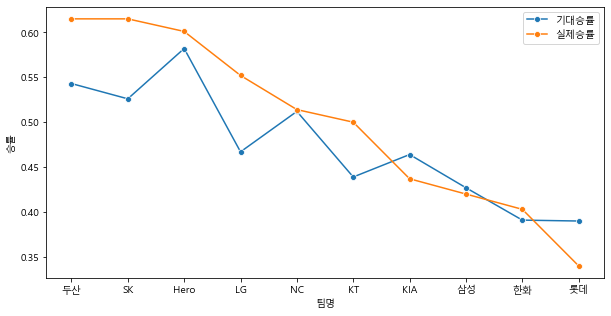

In [31]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.lineplot(data=expectation_df, x='팀명', y='콥-더글라스 기대승률', ax=ax1, sort=False, label='기대승률', marker='o')
sns.lineplot(data=expectation_df, x='팀명', y='승률', ax=ax1, sort=False, label='실제승률', marker='o')

#### 분석 내용
- 가을 야구에 진출한 5팀 중 4팀이 효율 1-5위 안에 들어갔습니다. 이를 통해 상위권 팀들이 대체로 효율있게 야구한 것을 알 수 있습니다.
- 하위권 팀들은 대체로 기대승률과 비슷한 승률을 기록했지만, 상위권 팀들의 효율있는 야구의 영향으로 가을야구를 할 수 없었습니다.
- 롯데는 유일하게 효율성이 90% 미만인 팀으로, 기대승률에 못미치는 성적을 냈습니다. 가진 전력만큼의 성적을 못내는 이유를 분석해야 할 것으로 보입니다.

### 3.2 공격과 수비가 가장 불균형한 팀은?
- 팀 공격밸런스 OPW+, 수비밸런스 DPW+를 계산해 공수 밸런스가 가장 맞지 않는 팀을 알아보고자 합니다.
 - 공격기여 기대승수 = (팀득점^2) / (팀득점^2 + 리그평균 팀실점^2) 
 - 투수/수비기여 기대승수 = (리그평균 팀득점^2) / (리그평균 팀득점^2 + 팀실점^2)
 - OPW+ = (공격기여 기대승수) - (팀경기수) * 0.5
 - DPW+ = (투수/수비기여 기대승수) - (팀경기수) * 0.5
- 출처 : [팀밸런스 지표 OPW+, DPW+와 팀수비력 지표 DRAA, DWAA](https://baseball-in-play.com/204)  
※ 출처에서는 기대승수를 구하는 식이 분모와 분자가 반대로 되어있어 올바른 식을 여기에 적었습니다.

1) 두 dataFrame 병합하기

In [32]:
merged_df = batting_df.merge(pitching_df, on='팀명', how='left')
merged_df

,팀명,승률_x,기대승률_x,R/G,득점,홈런,볼넷%_x,삼진%_x,BABIP_x,타율,출루율,장타율,OPS,wOBA,bWAR,승률_y,기대승률_y,RA/G,실점,피홈런,볼넷%_y,삼진%_y,BABIP_y,LOB%,ERA,RA9-WAR,FIP,kFIP,pWAR
0,두산,0.615,0.630,5.11,736.0,84.0,10.0,14.1,0.311,0.278,0.355,0.389,0.744,0.340,24.80,0.615,0.630,3.82,550.0,78.0,7.0,15.8,0.295,72.4,3.51,36.78,3.85,3.89,21.08
1,SK,0.615,0.582,4.55,655.0,117.0,8.4,17.4,0.303,0.262,0.334,0.384,0.718,0.326,16.35,0.615,0.582,3.79,546.0,99.0,8.0,20.0,0.305,74.3,3.50,37.19,3.81,3.71,24.72
2,Hero,0.601,0.637,5.42,780.0,112.0,9.1,16.7,0.325,0.282,0.354,0.414,0.768,0.348,29.32,0.601,0.637,3.97,572.0,61.0,6.8,18.1,0.315,70.3,3.61,32.35,3.48,3.44,25.13
3,LG,0.552,0.506,4.45,641.0,94.0,7.8,17.4,0.312,0.267,0.333,0.378,0.711,0.323,14.69,0.552,0.506,4.40,633.0,89.0,9.0,17.1,0.301,70.5,3.88,28.30,4.16,4.18,16.01
4,NC,0.514,0.530,4.68,674.0,128.0,8.1,15.6,0.312,0.278,0.345,0.416,0.761,0.343,25.20,0.514,0.530,4.38,631.0,103.0,8.7,17.7,0.306,71.6,4.02,28.15,4.22,4.22,16.20
5,KT,0.500,0.492,4.51,650.0,103.0,8.5,17.4,0.324,0.277,0.344,0.385,0.729,0.332,19.81,0.500,0.492,4.59,661.0,118.0,8.7,15.3,0.298,70.5,4.31,25.18,4.51,4.58,9.99
6,KIA,0.437,0.420,4.20,605.0,76.0,9.0,16.7,0.308,0.264,0.336,0.369,0.705,0.323,14.49,0.437,0.420,5.02,723.0,101.0,9.0,17.4,0.322,67.7,4.66,19.55,4.23,4.22,15.78
7,삼성,0.420,0.427,4.32,621.0,122.0,8.6,17.6,0.294,0.256,0.329,0.389,0.718,0.325,16.15,0.420,0.427,5.08,731.0,125.0,9.3,16.4,0.305,68.2,4.64,16.91,4.60,4.64,10.29
8,한화,0.403,0.413,4.22,607.0,88.0,8.0,19.9,0.310,0.256,0.324,0.362,0.686,0.313,9.29,0.403,0.413,5.12,737.0,120.0,9.3,16.5,0.325,69.0,4.82,18.31,4.55,4.58,10.44
9,롯데,0.340,0.376,4.01,578.0,90.0,7.8,19.8,0.301,0.250,0.316,0.358,0.674,0.308,6.57,0.340,0.376,5.31,764.0,120.0,9.5,18.0,0.330,67.9,4.86,13.41,4.38,4.34,13.18


2) 공격기여 기대승수 계산하기
- 공격기여 기대승수 : 팀실점이 리그평균수준일 때 그 팀이 거둘 수 있는 승수

In [33]:
merged_df['공격기여 기대승수'] = (merged_df['득점'] ** 2) / ((merged_df['득점'] ** 2) + ((merged_df['실점'].mean()) ** 2))
merged_df[['팀명','공격기여 기대승수']]

,팀명,공격기여 기대승수
0,두산,0.558185
1,SK,0.500153
2,Hero,0.586600
3,LG,0.489351
4,NC,0.514446
5,KT,0.496321
6,KIA,0.460532
7,삼성,0.473525
8,한화,0.462172
9,롯데,0.437944


3) 투수/수비기여 기대승수 계산하기
- 투수/수비기여 기대승수 : 팀실점이 리그평균수준일 때 그 팀의 공격력으로 얻을 수 있는 승수

In [34]:
merged_df['투수/수비기여 기대승수'] = ((merged_df['득점'].mean()) ** 2) / (((merged_df['득점'].mean()) ** 2) + (merged_df['실점'] ** 2))
merged_df[['팀명', '투수/수비기여 기대승수']]

,팀명,투수/수비기여 기대승수
0,두산,0.586258
1,SK,0.589795
2,Hero,0.567112
3,LG,0.516847
4,NC,0.518427
5,KT,0.495212
6,KIA,0.450546
7,삼성,0.445104
8,한화,0.441070
9,롯데,0.423412


기대승수 값들을 살펴보니 값들의 범위가 0.4 ~ 0.6임을 알 수 있습니다. 이를 통해 출처의 글 작성자가 '기대승률'을 '기대승수'로 잘못 적은 것이라고 추정할 수 있습니다. 해당 값들의 시즌 총 경기수인 144를 곱해 올바른 '기대승수'를 구합니다.

In [35]:
merged_df['공격기여 기대승수'] = merged_df['공격기여 기대승수'] * 144
merged_df['투수/수비기여 기대승수'] = merged_df['투수/수비기여 기대승수'] * 144
merged_df[['팀명', '공격기여 기대승수', '투수/수비기여 기대승수']]

,팀명,공격기여 기대승수,투수/수비기여 기대승수
0,두산,80.378688,84.421162
1,SK,72.021988,84.930421
2,Hero,84.470422,81.664074
3,LG,70.466604,74.425963
4,NC,74.080240,74.653528
5,KT,71.470271,71.310497
6,KIA,66.316549,64.878648
7,삼성,68.187658,64.094978
8,한화,66.552753,63.514048
9,롯데,63.063882,60.971361


4) OPW+와 DPW+ 계산

In [36]:
merged_df['OPW+'] = merged_df['공격기여 기대승수'] - (144 * 0.5)
merged_df['DPW+'] = merged_df['투수/수비기여 기대승수'] - (144 * 0.5)

merged_df[['팀명', '공격기여 기대승수', 'OPW+', '투수/수비기여 기대승수', 'DPW+']]

,팀명,공격기여 기대승수,OPW+,투수/수비기여 기대승수,DPW+
0,두산,80.378688,8.378688,84.421162,12.421162
1,SK,72.021988,0.021988,84.930421,12.930421
2,Hero,84.470422,12.470422,81.664074,9.664074
3,LG,70.466604,-1.533396,74.425963,2.425963
4,NC,74.080240,2.080240,74.653528,2.653528
5,KT,71.470271,-0.529729,71.310497,-0.689503
6,KIA,66.316549,-5.683451,64.878648,-7.121352
7,삼성,68.187658,-3.812342,64.094978,-7.905022
8,한화,66.552753,-5.447247,63.514048,-8.485952
9,롯데,63.063882,-8.936118,60.971361,-11.028639


- OPW+는 해당 팀 수비가 리그 평균일 때 해당 팀이 공격으로 5할보다 몇 승을 더 얻을 수 있는지 나타내는 지표입니다.
- DPW+는 해당 팀 공격이 리그 평균일 때 해당 팀이 수비로 5할보다 몇 승을 더 얻을 수 있는지 나타내는 지표입니다.
- 공격과 수비가 불균형을 이루는 팀이 어디인지 알아보기 위해 **'OPW+와 DPW의 차의 절댓값'**을 구합니다.

In [37]:
import math
merged_df['공수 밸런스 차'] = abs(merged_df['OPW+'] - merged_df['DPW+'])

merged_df[['팀명', '공격기여 기대승수', 'OPW+', '투수/수비기여 기대승수', 'DPW+', '공수 밸런스 차']]

,팀명,공격기여 기대승수,OPW+,투수/수비기여 기대승수,DPW+,공수 밸런스 차
0,두산,80.378688,8.378688,84.421162,12.421162,4.042475
1,SK,72.021988,0.021988,84.930421,12.930421,12.908433
2,Hero,84.470422,12.470422,81.664074,9.664074,2.806349
3,LG,70.466604,-1.533396,74.425963,2.425963,3.959359
4,NC,74.080240,2.080240,74.653528,2.653528,0.573288
5,KT,71.470271,-0.529729,71.310497,-0.689503,0.159774
6,KIA,66.316549,-5.683451,64.878648,-7.121352,1.437901
7,삼성,68.187658,-3.812342,64.094978,-7.905022,4.092680
8,한화,66.552753,-5.447247,63.514048,-8.485952,3.038705
9,롯데,63.063882,-8.936118,60.971361,-11.028639,2.092522


- '공수 밸런스 차'를 시각화해봅니다

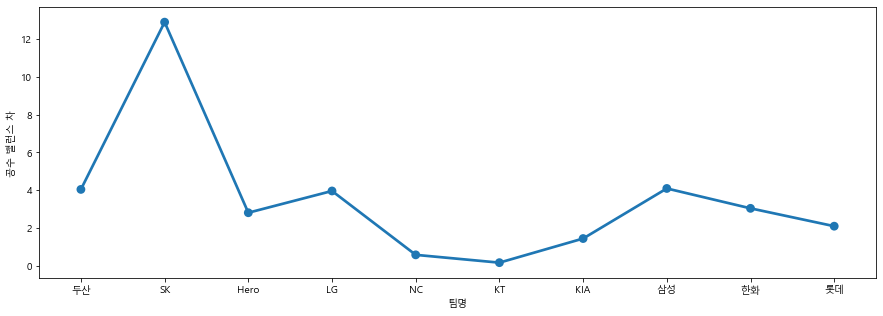

In [38]:
plt.figure(figsize=(15,5))
sns.pointplot(data=merged_df, x='팀명', y='공수 밸런스 차')

#### 분석 내용
1. 거의 모든 팀이 공수 밸런스 차가 5를 넘기지 않았습니다. 특히 중위권 팀들이 상위권 팀들보다 공수 능력 차이가 없다는 것을 알 수 있습니다.
2. SK는 두산과 승률이 같아, 승률만 따졌을 때는 공동 1등이지만 공수 밸런스 차가 무려 두산의 약 3배입니다. SK의 투수/수비 능력은 뛰어났지만 공격 능력이 평범해 나타난 현상입니다. 다음 시즌 팀 성적을 위해 SK 타자들이 더 많은 득점을 내는 야구를 훈련해야 할 것으로 보입니다.

### 3.3 승률과 다른 기록들과의 상관관계
- 승률과 어떤 기록이 상관계수가 높은지 알기 쉽게 시각화를 합니다.

#### 3.3.1 타격 기록과 승률의 상관계수

In [39]:
batting_df.corr()['승률']

승률       1.000000
기대승률     0.959411
R/G      0.815975
득점       0.816986
홈런       0.254561
볼넷%      0.499847
삼진%     -0.709864
BABIP    0.455715
타율       0.735847
출루율      0.787832
장타율      0.623200
OPS      0.729126
wOBA     0.744815
bWAR     0.749415
Name: 승률, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


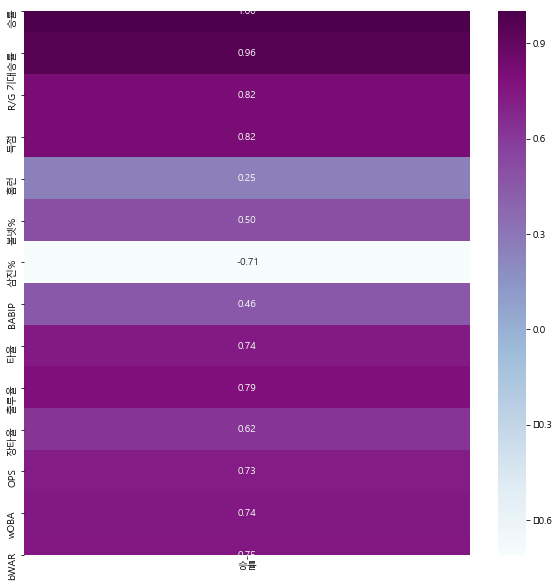

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(data=batting_df.corr()['승률'].to_frame(), fmt='.2f', cmap='BuPu', annot=True)

- 타격 기록 중 '기대 승률'을 제외하면 '승률'과 상관관계가 가장 높은 기록은 '득점'입니다.

#### 3.3.2 투구/수비 기록과 승률의 상관계수

In [41]:
pitching_df.corr()['승률']

승률         1.000000
기대승률       0.959411
RA/G      -0.984662
실점        -0.984712
피홈런       -0.789852
볼넷%       -0.843789
삼진%        0.208430
BABIP     -0.694982
LOB%       0.844770
ERA       -0.981680
RA9-WAR    0.983619
FIP       -0.802086
kFIP      -0.765844
pWAR       0.797994
Name: 승률, dtype: float64

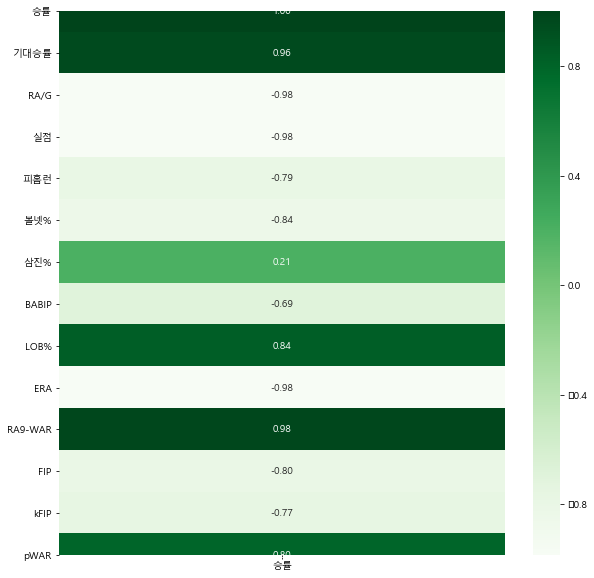

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(data=pitching_df.corr()['승률'].to_frame(), fmt='.2f', cmap='Greens', annot=True)

- 투구/수비 기록 중 '기대 승률'을 제외하면 '승률'과 상관관계가 가장 높은 기록은 '실점'입니다.